**Decision Tree classifier**

In [35]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import recall_score #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_recall_fscore_support #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import f1_score #Import scikit-learn metrics module for accuracy calculation

First let us look at a categorical classification example.

Basically, the same example we looked at iin the class.

In [36]:
X = np.array([['Snow','Overcast','Sunny','Overcast','Overcast','Snow','Overcast', 'Sunny', 'Sunny','Snow','Snow','Overcast','Overcast'],
    ['Yes','No','Yes','Yes','No','No','Yes','Yes','No','No','Yes','Yes','No'],
    ['No','No','No','Yes','Yes','Yes','No','No','Yes','Yes','No','No','Yes']          ])
X = X.T

In [37]:
print(X)

[['Snow' 'Yes' 'No']
 ['Overcast' 'No' 'No']
 ['Sunny' 'Yes' 'No']
 ['Overcast' 'Yes' 'Yes']
 ['Overcast' 'No' 'Yes']
 ['Snow' 'No' 'Yes']
 ['Overcast' 'Yes' 'No']
 ['Sunny' 'Yes' 'No']
 ['Sunny' 'No' 'Yes']
 ['Snow' 'No' 'Yes']
 ['Snow' 'Yes' 'No']
 ['Overcast' 'Yes' 'No']
 ['Overcast' 'No' 'Yes']]


In [38]:
y = np.array(['Yes','No','Yes','Yes','Yes','No','No','No','Yes','Yes','No','No','Yes'])
y

array(['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes'], dtype='<U3')

**Let's do label encoding to replacce the values with integers**

In [39]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
X1 = le1.fit_transform(X[:,0])
X2 = le2.fit_transform(X[:,1])
X3 = le3.fit_transform(X[:,2])

**Now let us cretate the new encoded data set**

In [40]:
X = np.array([X1, X2, X3])
X = X.T

In [41]:
yle = preprocessing.LabelEncoder()
y = yle.fit_transform(y)
y

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

**Creating the train and test dataset**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [43]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

**Let's evaluate the scores**

In [44]:
print(f'Accuracy score is {accuracy_score(y_test, y_pred)}')
print(f'Error rate is {1-accuracy_score(y_test, y_pred)}')
print(f'F-score is {f1_score(y_test, y_pred, average=None)}')
print(f'Precision is {precision_score(y_test, y_pred, average=None)}') # Compute the precision.
print(f'Recall is {recall_score(y_test, y_pred, average=None)}') #Compute the Recall
print(precision_recall_fscore_support(y_test, y_pred, average=None)) #Compute precision, recall, F-measure and support for each class.

Accuracy score is 1.0
Error rate is 0.0
F-score is [1. 1.]
Precision is [1. 1.]
Recall is [1. 1.]
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([1, 2]))


**Good thing about Decision Tree classifier is that we can visualize the decision tree**

**Need to install graphviz and pydotplus**

**The export_graphviz function converts the decision tree classifier into a dot file, and pydotplus converts this dot file to png or displayable form on Jupyter.**

In [45]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

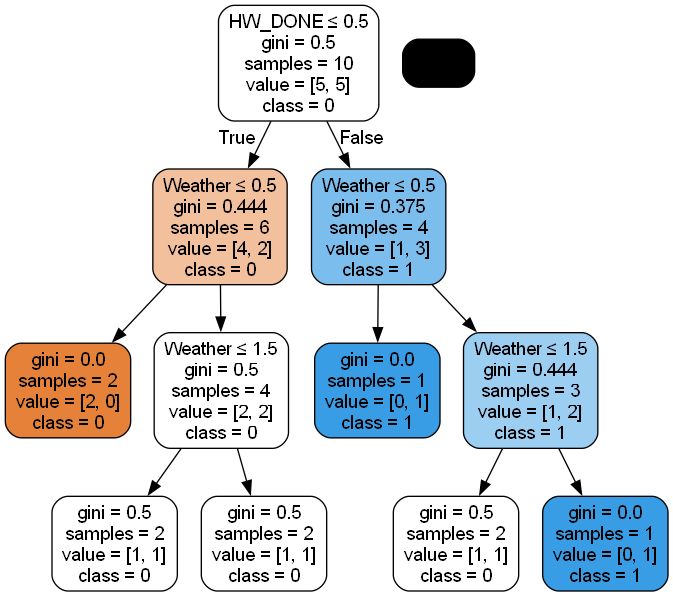

In [46]:
feature_cols = ['Weather', 'Weekend' ,'HW_DONE']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gohiking.png')
Image(graph.create_png())


**Decision Tree classifier on a synthetic dataset**

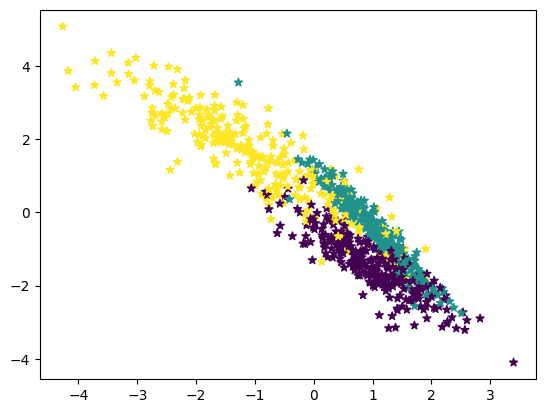

In [47]:
from sklearn.datasets import make_classification
data, target = make_classification(n_features=6, n_classes=3, n_samples=800, n_informative=2, random_state=1, n_clusters_per_class=1)
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c=target, marker="*");

In [50]:
data_train, data_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=125)

In [51]:
# Create Decision Tree classifer object
clf_syn = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_syn = clf_syn.fit(data_train,y_train)

#Predict the response for test dataset
y_pred = clf_syn.predict(data_test)

In [52]:
print(f'Accuracy score is {accuracy_score(y_test, y_pred)}')
print(f'Error rate is {1-accuracy_score(y_test, y_pred)}')
print(f'F-score is {f1_score(y_test, y_pred, average=None)}')
print(f'Precision is {precision_score(y_test, y_pred, average=None)}') # Compute the precision.
print(f'Recall is {recall_score(y_test, y_pred, average=None)}') #Compute the Recall
print(precision_recall_fscore_support(y_test, y_pred, average=None)) #Compute precision, recall, F-measure and support for each class.

Accuracy score is 0.8
Error rate is 0.19999999999999996
F-score is [0.82568807 0.7826087  0.79166667]
Precision is [0.76271186 0.8490566  0.79166667]
Recall is [0.9        0.72580645 0.79166667]
(array([0.76271186, 0.8490566 , 0.79166667]), array([0.9       , 0.72580645, 0.79166667]), array([0.82568807, 0.7826087 , 0.79166667]), array([50, 62, 48]))


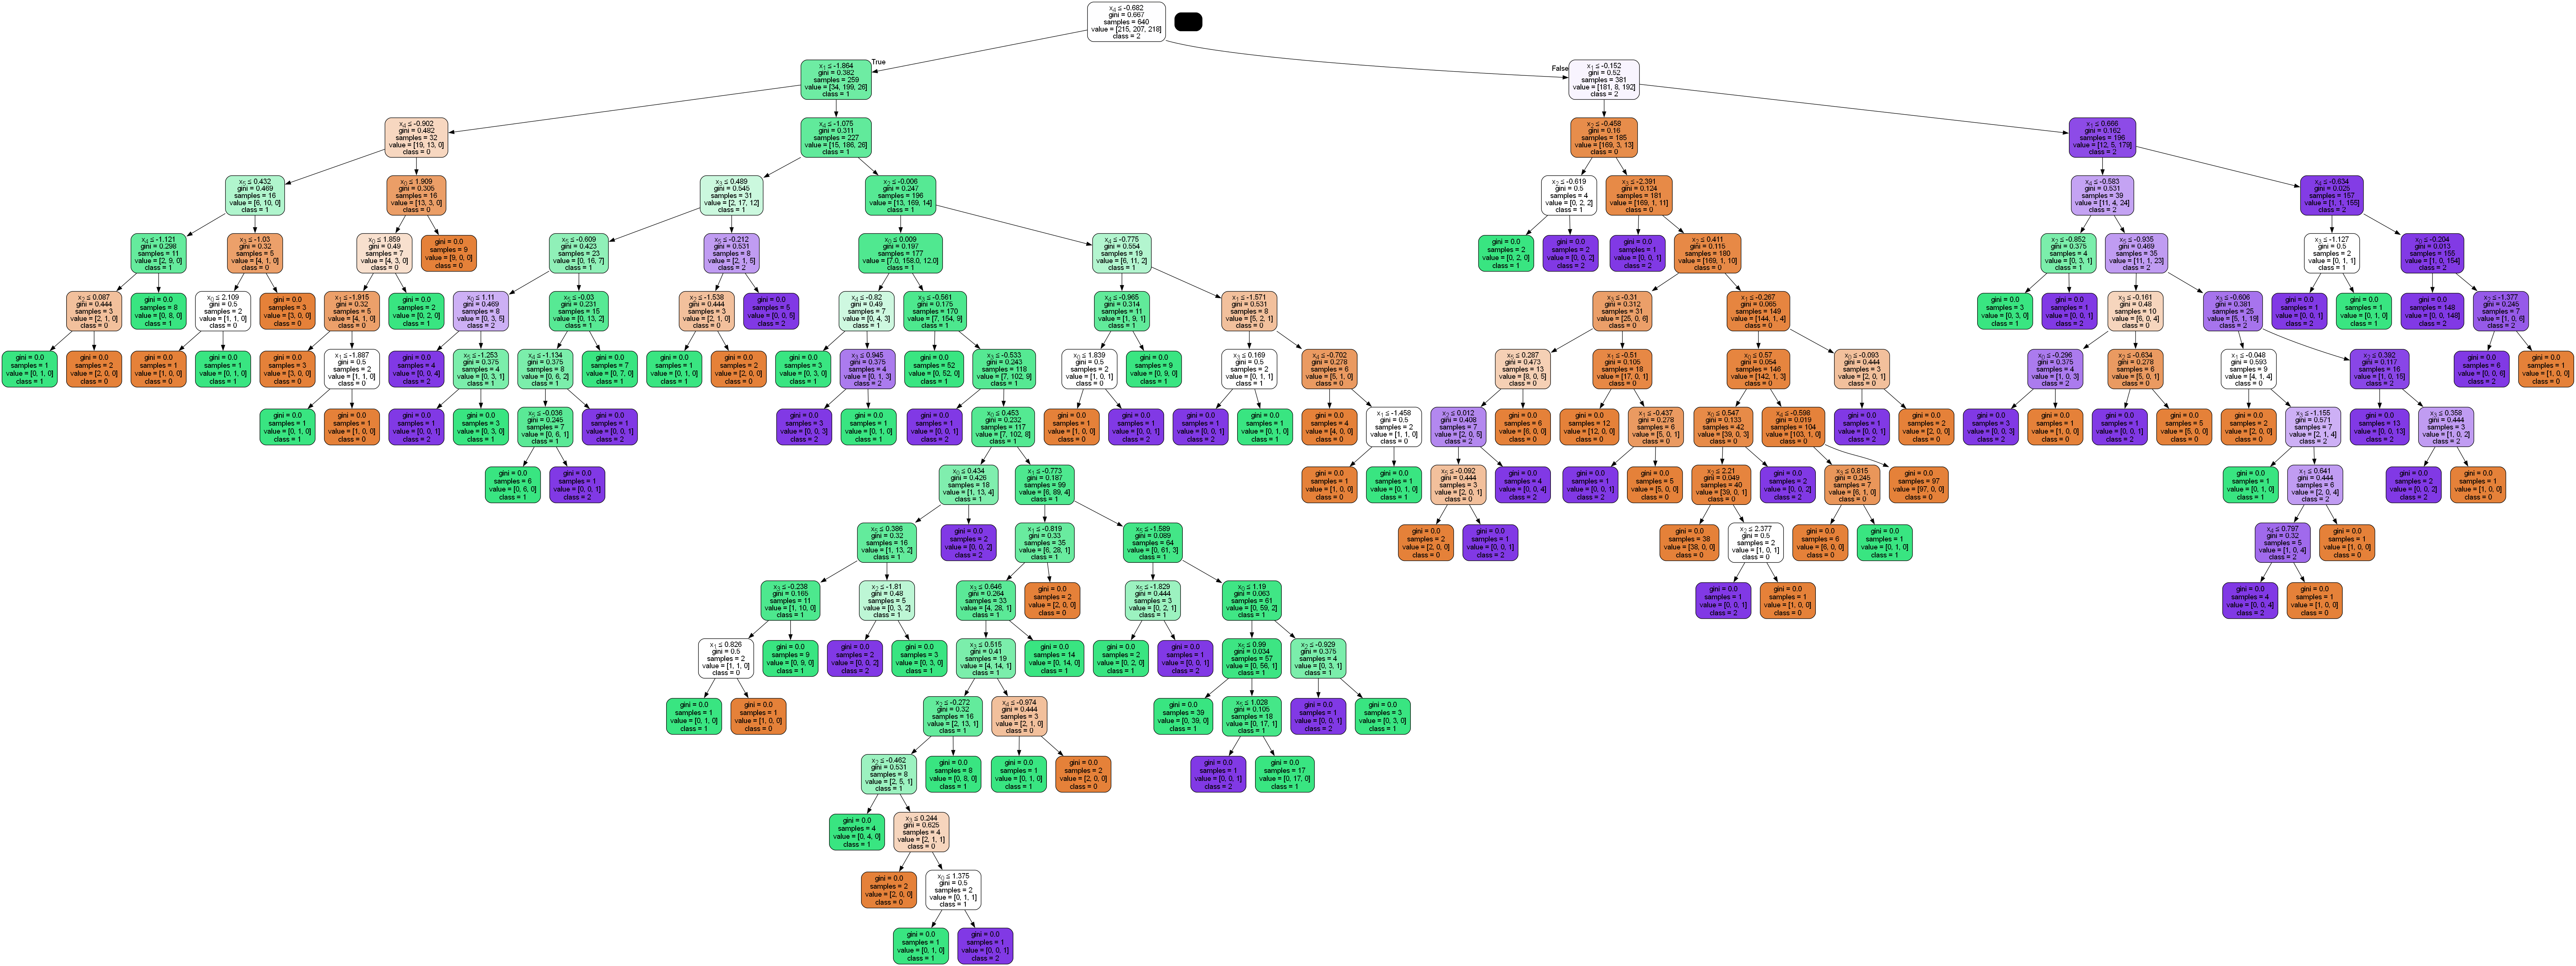

In [53]:
# feature_cols = ['1', '2' ,'3', '4', '5', '6']
dot_data = StringIO()
export_graphviz(clf_syn, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('synthetic.png')
Image(graph.create_png())